# Hedonic Pricing Lab Nora Wiktorowicz

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 66 (delta 10), reused 6 (delta 6), pack-reused 41 (from 2)
Receiving objects: 100% (66/66), 13.84 MiB | 14.20 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [45]:
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory = False)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


**1. Clean the data and perform some EDA and visualization to get to know the data set.**

In [46]:
#CLEANING THE DATA
print(df.isnull().sum())
df.dropna(subset=['Price', 'Room Type'], inplace=True) #remove rows with missing data in important columns
print(df.dtypes) #look at data types to see what needs to be convered
df['price'] = pd.to_numeric(df['Price'], errors='coerce') #conver price and beds to numeric
df.dropna(subset=['Price'], inplace=True)
df['Beds'] = pd.to_numeric(df['Beds'], errors='coerce')


Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64
Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object


             Host Id Host Since                          Name Neighbourhood   \
count   3.047800e+04      30475                         30478          30478   
unique           NaN       2240                         29413              5   
top              NaN  2/10/2014  Charming West Village studio      Manhattan   
freq             NaN         70                            15          16033   
mean    1.273171e+07        NaN                           NaN            NaN   
std     1.190270e+07        NaN                           NaN            NaN   
min     5.000000e+02        NaN                           NaN            NaN   
25%     2.701298e+06        NaN                           NaN            NaN   
50%     8.551693e+06        NaN                           NaN            NaN   
75%     2.120617e+07        NaN                           NaN            NaN   
max     4.303307e+07        NaN                           NaN            NaN   

       Property Type  Review Scores Rat

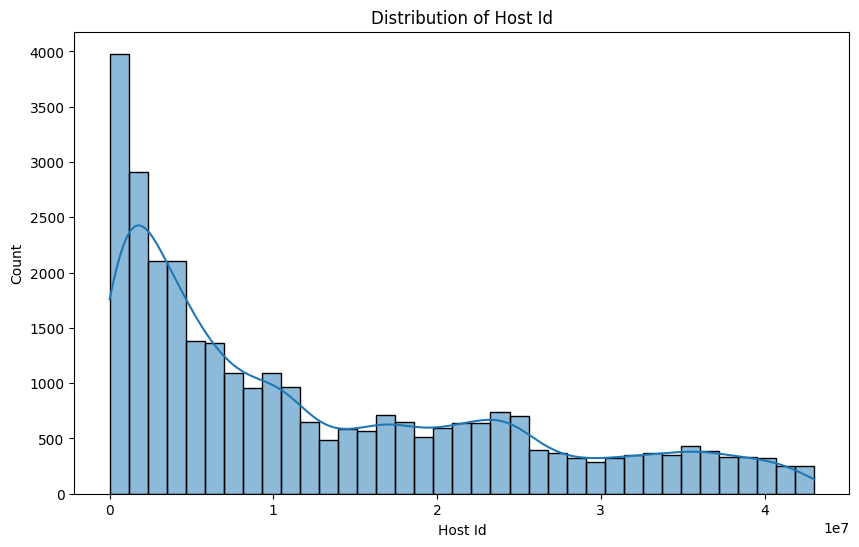

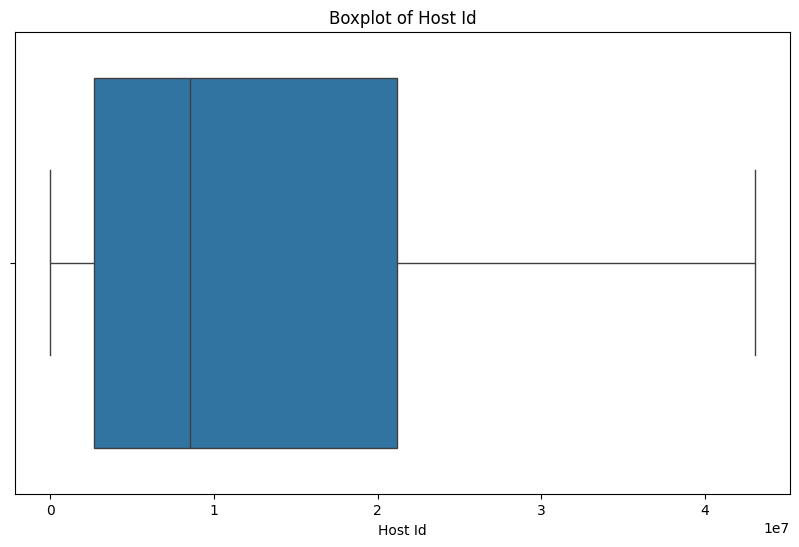

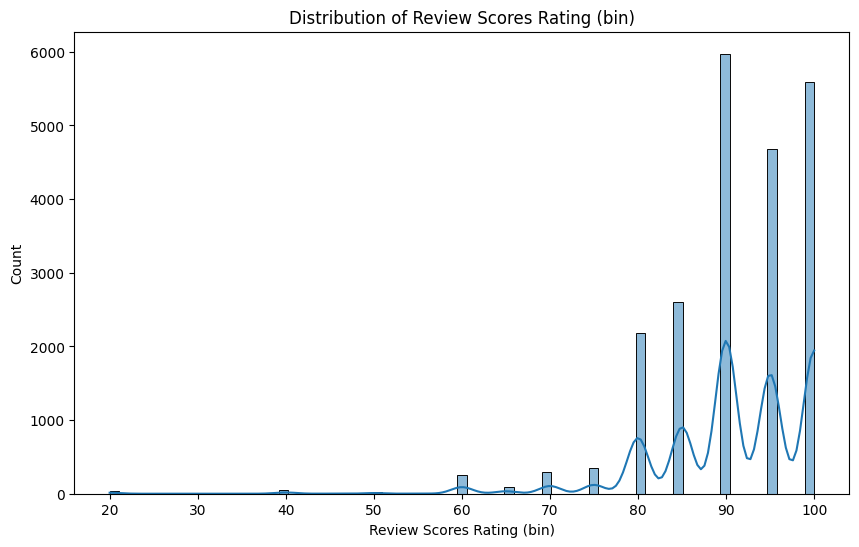

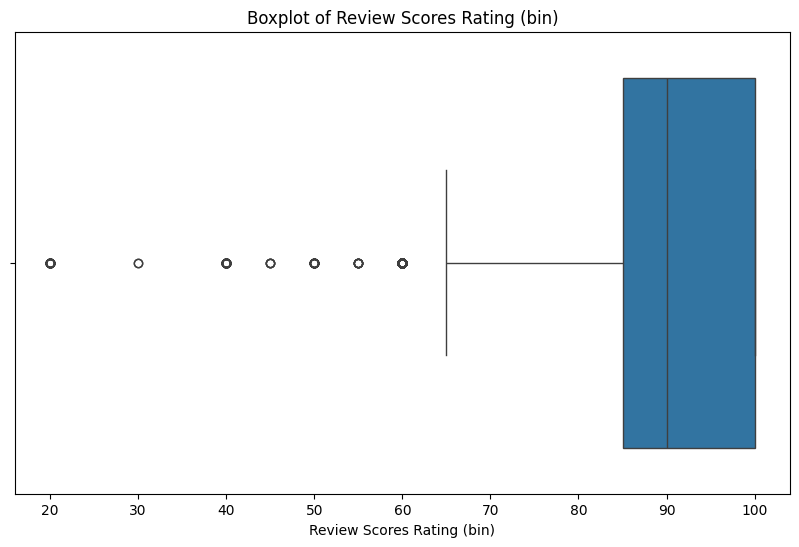

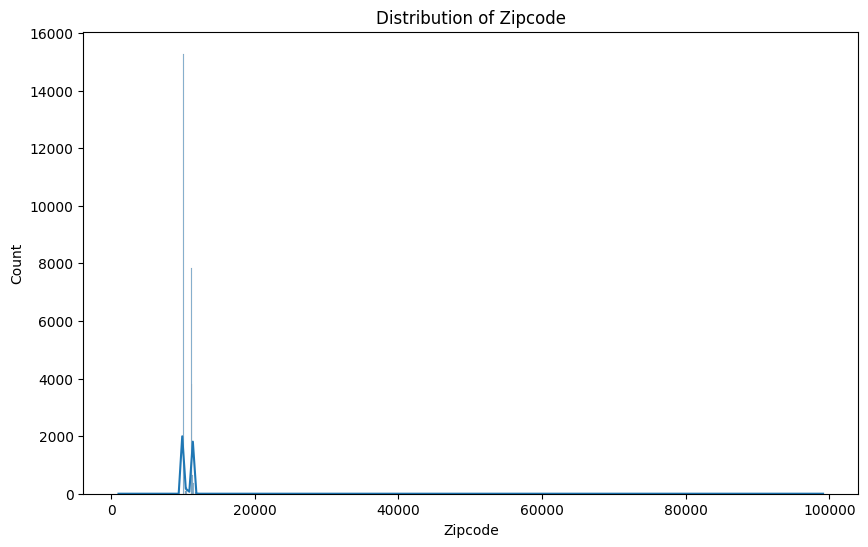

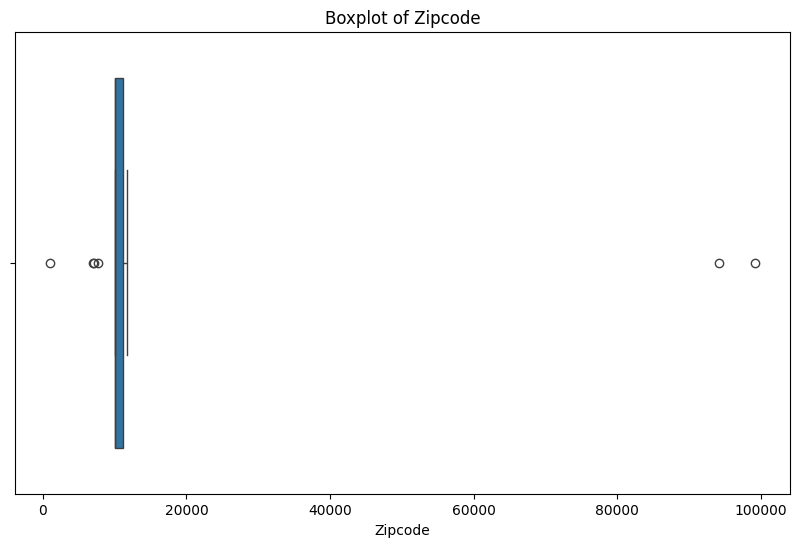

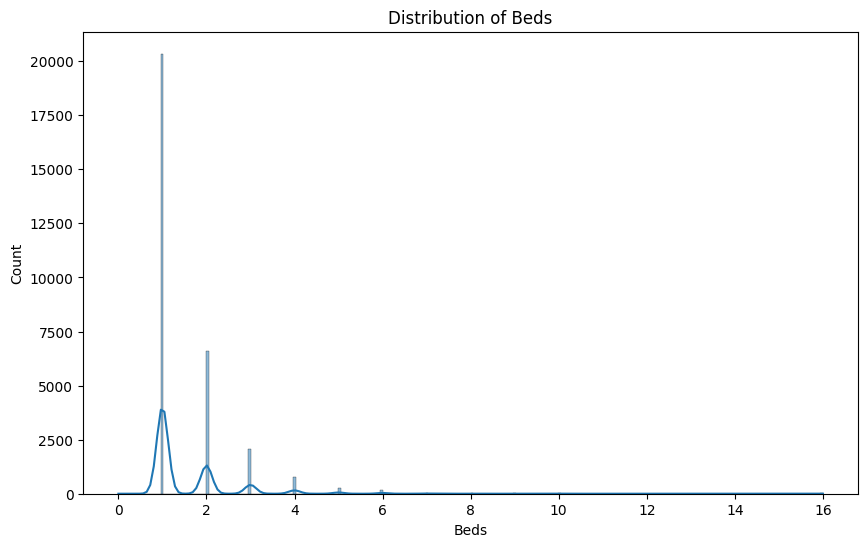

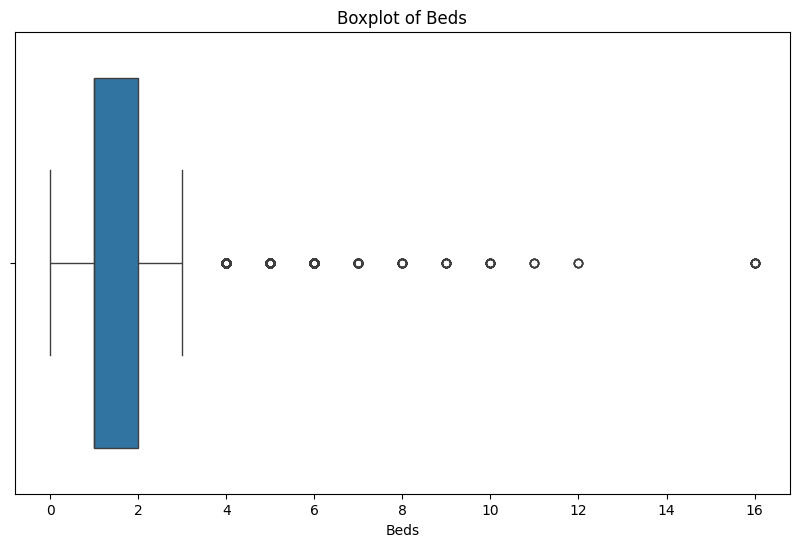

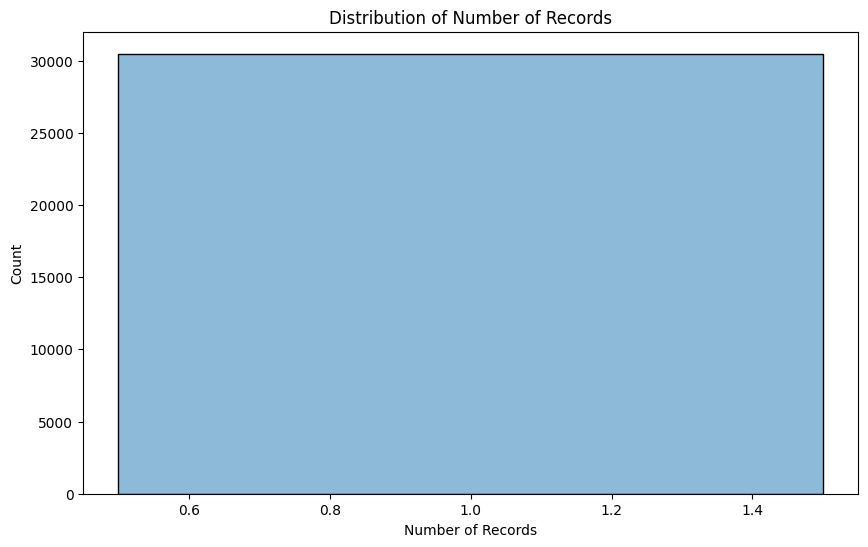

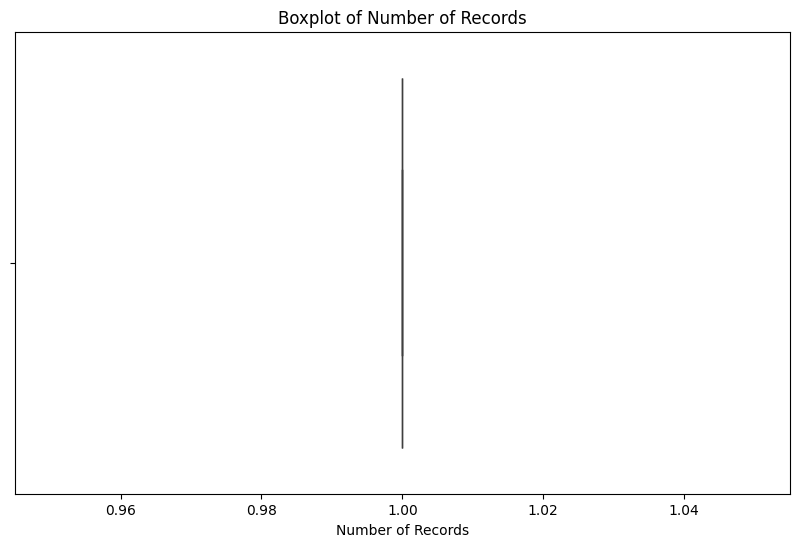

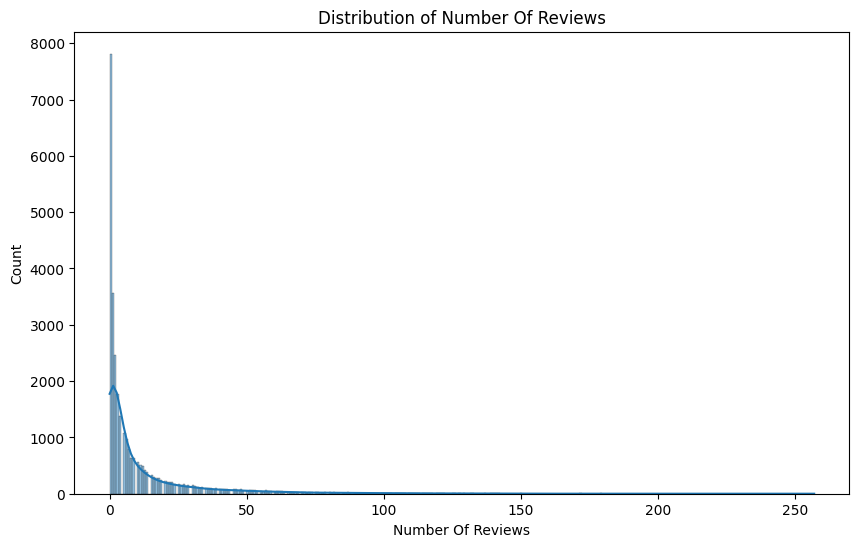

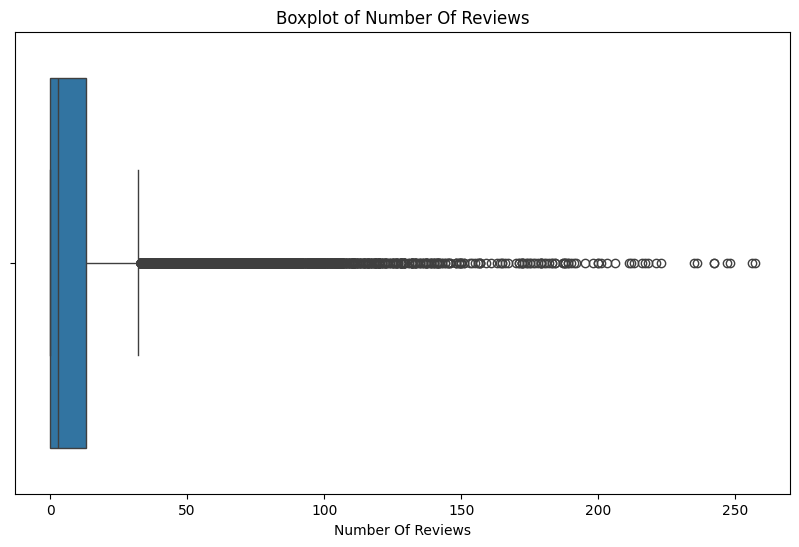

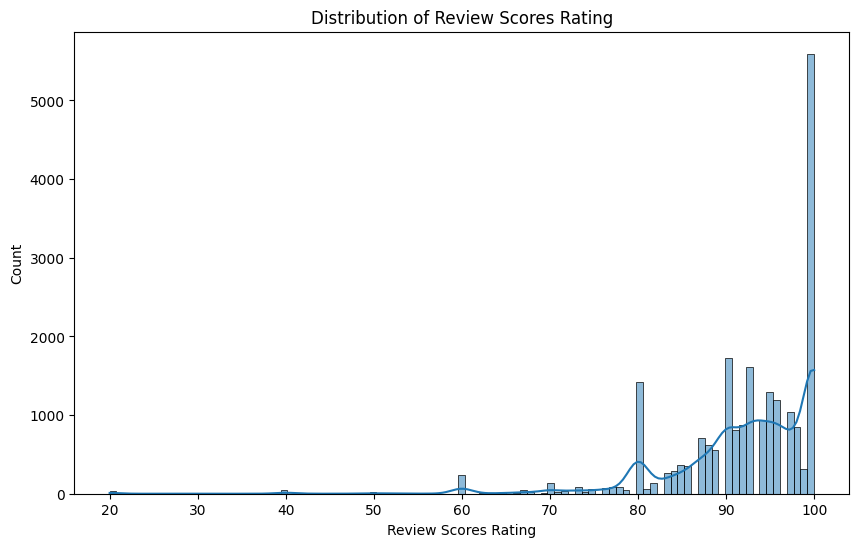

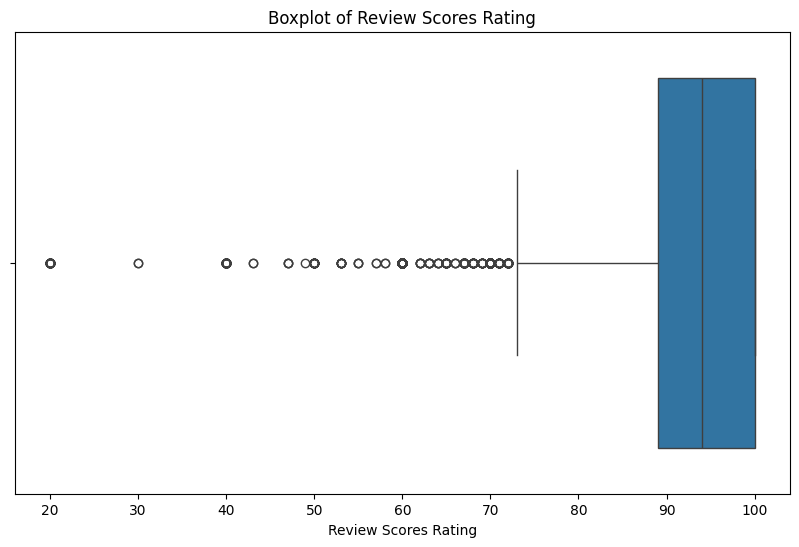

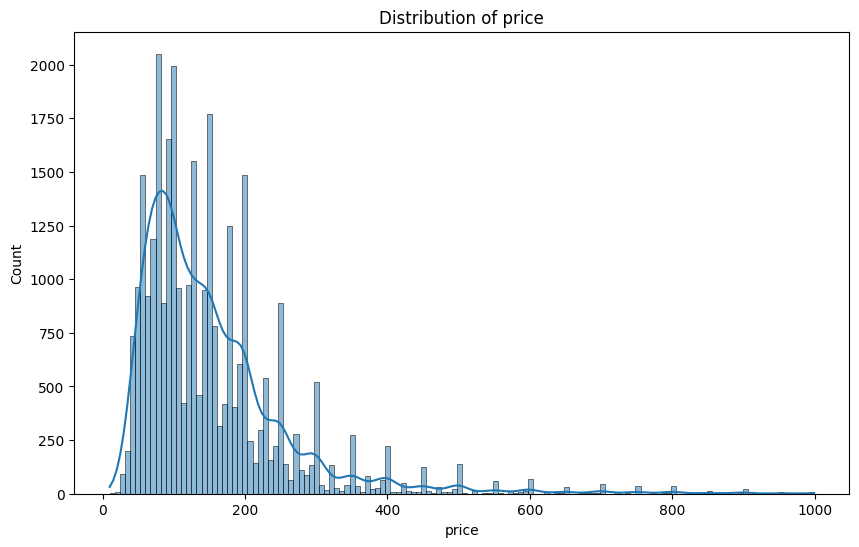

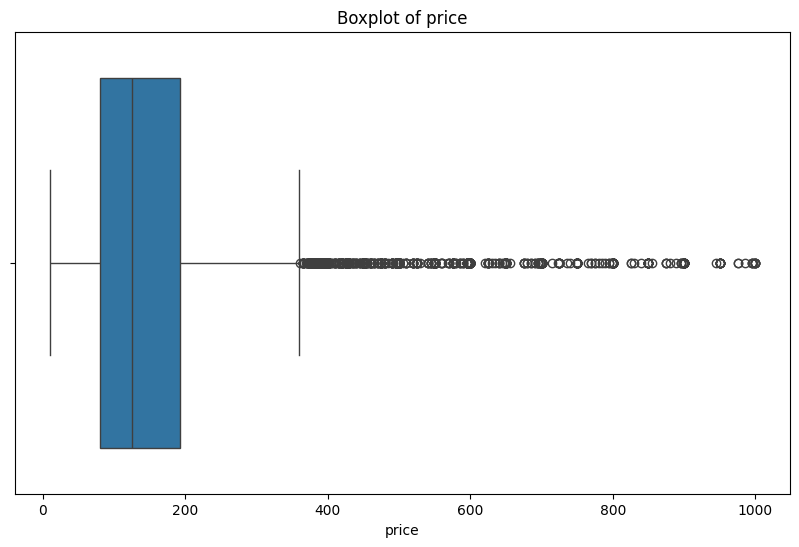

In [47]:
#PERFORM EDA
print(df.describe(include='all')) #describe variables
print(df.dtypes) #see all variable types

numerical_cols = df.select_dtypes(include=np.number).columns #see the distribution of numerical variables
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()


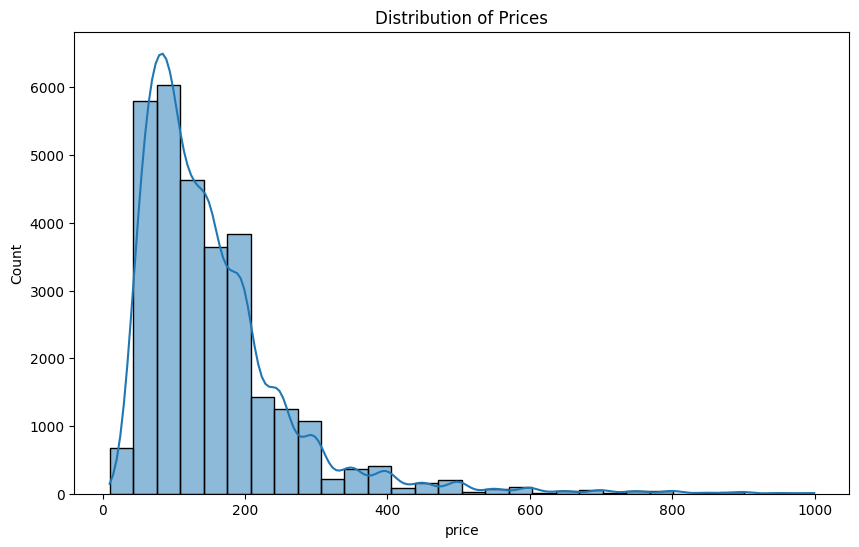

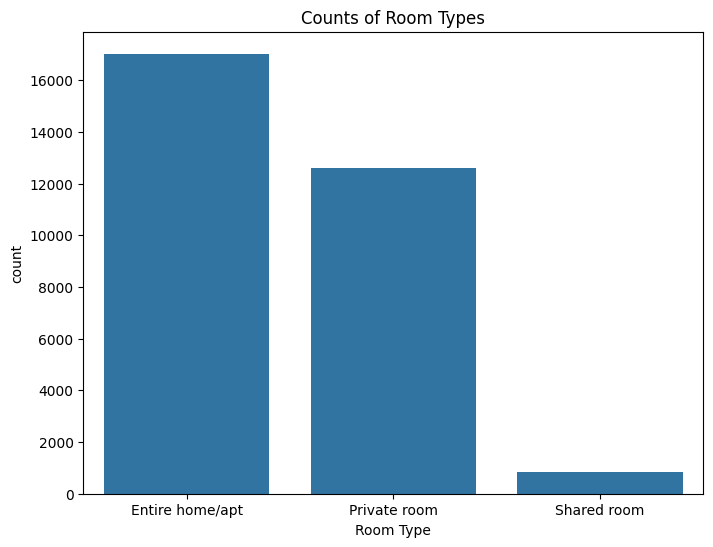

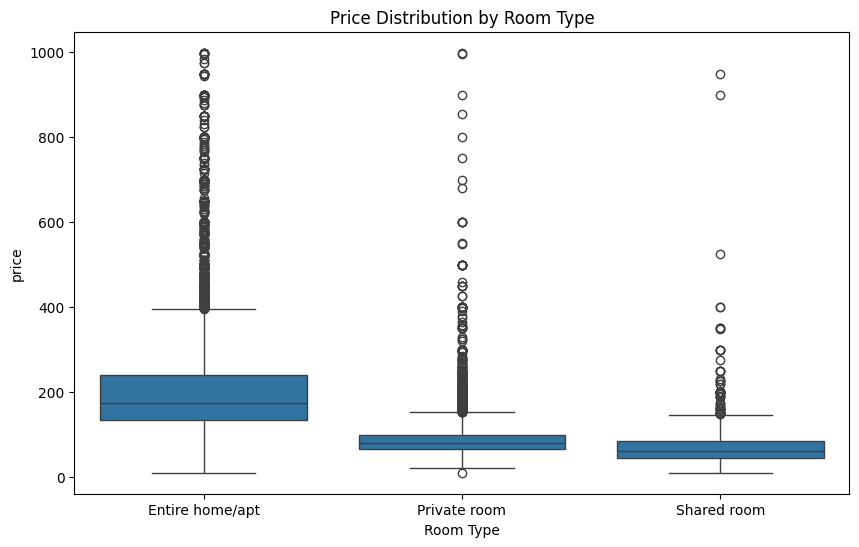

In [48]:
#ADDITIONAL VISUALIZATIONS
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Room Type', data=df) # Use the original column name 'Room Type'
plt.title('Counts of Room Types')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Room Type', y='price', data=df) # Use the original column name 'Room Type'
plt.title('Price Distribution by Room Type')
plt.show()

**2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.**

In [49]:
room_type_dummies = pd.get_dummies(df['Room Type'], prefix='Room Type', drop_first=True)
df = pd.concat([df, room_type_dummies], axis=1)
df.drop('Room Type', axis=1, inplace=True)
df['log_price'] = np.log1p(df['price'])
df['Host Since'] = pd.to_datetime(df['Host Since'], errors='coerce')
categorical_cols = ['Name', 'Neighbourhood', 'Property Type', 'Room Type']
print(df.head())

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaT     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaT     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaT                Sunny Room in Harlem      Manhattan   
3       500 2008-06-26  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500 2008-06-26            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)  Zipcode  Beds  Number of Records  \
0     Apartment                         NaN  11249.0   1.0                  1   
1     Apartment                         NaN  11206.0   1.0                  1   
2     Apartment                         NaN  10032.0   1.0                  1   
3     Apartment                         NaN  10024.0   3.0                  1   
4     Apartment                        95.0  10036.0   3.0                  1   

   Number Of Reviews Price  Review Scores Rating  

**3. Implement an ~80/~20 train-test split. Put the test data aside.**

In [67]:
from sklearn.model_selection import train_test_split
X = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?**

**5.Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?**

**6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?**

**7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?**

**8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.**